<a href="https://colab.research.google.com/github/derektorquette/estatistica-para-analise-de-dados-com-python/blob/main/tratamento_enem_2019_SP_reduzido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO ANÁLISE ESTATÍSTICA DO ENEM 2019**

Este projeto analisa os resultados do ENEM no estado de São Paulo do ano de 2019.

Os dados foram extraídos do site do INEP:

http://inep.gov.br/microdados

In [1]:
import numpy as np # biblioteca de modelos matemáticos
import pandas as pd # biblioteca para manipulação dos dados

In [55]:
dados = pd.read_csv('/content/drive/MyDrive/CURSOS LIVRES FORMAÇÃO COMPLEMENTAR/3. Udemy/Estatística para Análise de Dados com Python/Seção 3 - Preparação, organização e estruturação dos dados/microdados_enem_2019_sp.csv',
                    sep=';', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8(nesse arquivo não funcionou), latin-1)

## Extração e Limpeza dos dados

In [4]:
pd.options.display.max_columns = 44

In [5]:
dados.head() # cabeçalho, para maiores informações consultar o Dicionário de Microdados Enem

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,5646.0,5858.0,5929.0,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,1,1,1,1,5762.0,6411.0,6343.0,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,1,1,1,1,4022.0,4248.0,5096.0,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [54]:
# O número total de inscritos em São Paulo foi de 813772, sendo de 15,97% de todo o Brasil que foi de 5095308 inscritos.
dados.shape         # registros (linhas) e variáveis/atributos (colunas)

(813772, 44)

In [ ]:
# Análise dos tipos de atributos.
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

In [74]:
dados1 = dados.drop(columns=['CO_MUNICIPIO_RESIDENCIA']) # é de boa prática gerar uma nova variável

In [66]:
dados1.head() # cinco primeiras linhas

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,1,3,1,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,5646.0,5858.0,5929.0,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,19,M,1,3,1,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,17,F,1,3,1,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,1,1,1,1,5762.0,6411.0,6343.0,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,19,M,1,3,1,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,1,1,1,1,4022.0,4248.0,5096.0,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,37,M,2,1,1,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [73]:
dados1 = dados1.drop(columns=['CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','CO_MUNICIPIO_NASCIMENTO'], ) # foram cortados os atributos

In [ ]:
dados1.head(10)

In [77]:
dados1 = dados1.drop(columns=['NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','SG_UF_NASCIMENTO',
                              'TP_ANO_CONCLUIU','TP_ENSINO','CO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC'],) # mais cortes, para dúvidas consultar dicionário

In [ ]:
dados1.head()

In [78]:
dados1 = dados1.drop(columns=['TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC'],) # foram feitas várias limpezas gradativas como exemplo

In [ ]:
dados1.head()

In [16]:
dados1.shape # dos 44 atributos restaram apenas 29.

(813772, 29)

##PROBLEMA! Corrigindo erros nas notas

In [79]:
dados1.loc[:,'NU_NOTA_CN'] /= 10 #localizar todas as linhas e coluna específica para corrigir o número

In [ ]:
dados1.head()

In [87]:
dados1.loc[:,'NU_NOTA_CH'] /= 10 # corrigindo os números das outras colunas
dados1.loc[:,'NU_NOTA_LC'] /= 10
dados1.loc[:,'NU_NOTA_MT'] /= 10

In [84]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,35,SP,22,M,1,3,1,1506500.0,1,1,0,NaN,NaN,1,1,1,1,564.6,58.58,59.29,60.02,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,1,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,35,SP,17,F,1,3,1,1501402.0,2,3,0,15567761.0,Belém,1,1,1,1,576.2,64.11,63.43,73.18,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,2,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,42.48,50.96,39.32,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,1,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


##Renomeando Variáveis (colunas)

In [85]:
dados1 = dados1.rename(columns={'NU_NOTA_REDACAO': 'NOTA_REDACAO'})

In [23]:
dados1 = dados1.rename(columns={'NU_NOTA_CN': 'NOTA_CN','NU_NOTA_CH': 'NOTA_CH',
                                'NU_NOTA_LC': 'NOTA_LC','NU_NOTA_MT': 'NOTA_MT'})

In [24]:
dados1 = dados1.rename(columns={'NU_NOTA_COMP1': 'COMP1','NU_NOTA_COMP2': 'COMP2',
                                'NU_NOTA_COMP3': 'COMP3','NU_NOTA_COMP4': 'COMP4',
                                'NU_NOTA_COMP5':'COMP5'})

In [91]:
dados1 = dados1.rename(columns={'NU_IDADE': 'IDADE','TP_SEXO': 'SEXO',
                                'TP_COR_RACA': 'RACA','Q025': 'INTERNET',
                                'TP_ESCOLA':'ESCOLA'})

In [92]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,35,SP,22,M,1,3,1,1506500.0,1,1,0,NaN,NaN,1,1,1,1,564.6,5.858,5.929,6.002,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,1,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,35,SP,17,F,1,3,1,1501402.0,2,3,0,15567761.0,Belém,1,1,1,1,576.2,6.411,6.343,7.318,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,2,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,4.248,5.096,3.932,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,1,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


##Renomeando Registros (Linhas)

In [93]:
dados1["RACA"] = dados1["RACA"].replace({0:"nao_declarado", 1:"branca", 2:"preta", 3:"parda", 4:"amarela", 5:"indigena"}) #fazer alteração na coluna raça

In [94]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,35,SP,22,M,1,parda,1,1506500.0,1,1,0,NaN,NaN,1,1,1,1,564.6,5.858,5.929,6.002,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,35,SP,19,M,1,parda,1,1503804.0,1,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,35,SP,17,F,1,parda,1,1501402.0,2,3,0,15567761.0,Belém,1,1,1,1,576.2,6.411,6.343,7.318,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,35,SP,19,M,1,parda,1,3548708.0,2,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,4.248,5.096,3.932,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,35,SP,37,M,2,branca,1,3549409.0,1,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [28]:
# OUTRA MANEIRA
# dados1['RACA'] = dados1['RACA'].replace([0,1,2,3,4,5], ['Não Declarado','Branca','Preta','Parda','Amarela','Indígena'])

In [95]:
dados1["TP_LINGUA"] = dados1["TP_LINGUA"].replace({0:"Inglês", 1:"Espanhol"})

In [96]:
dados1["ESCOLA"] = dados1["ESCOLA"].replace({1:"não_respondeu", 2:"pública", 3:"privada", 4:"exterior"})

In [97]:
dados1["INTERNET"] = dados1["INTERNET"].replace({"A":"Não", "B":"Sim"})

In [98]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,35,SP,22,M,1,parda,1,1506500.0,1,não_respondeu,0,NaN,NaN,1,1,1,1,564.6,5.858,5.929,6.002,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",Pinhalzinho,35,SP,19,M,1,parda,1,1503804.0,1,não_respondeu,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,"1,90E+11",São Paulo,35,SP,17,F,1,parda,1,1501402.0,2,privada,0,15567761.0,Belém,1,1,1,1,576.2,6.411,6.343,7.318,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
3,"1,90E+11",São Bernardo do Campo,35,SP,19,M,1,parda,1,3548708.0,2,pública,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,4.248,5.096,3.932,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
4,"1,90E+11",São Joaquim da Barra,35,SP,37,M,2,branca,1,3549409.0,1,não_respondeu,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim


## Análise Exploratória e Transformação dos dados

**Análise das idades**

In [ ]:
dados1['IDADE'].value_counts()


In [ ]:
dados1['IDADE'].value_counts().sort_index()

In [109]:
# Para ver todas as linhas, primeiro transforme num Dataframe:
idade = pd.DataFrame(dados1['IDADE'].value_counts().sort_index())

In [112]:
# Configura o Pandas para observar 10 linhas
pd.set_option('display.max_rows', 10)

In [113]:
idade.head(10)

,IDADE
2,1
3,1
4,1
5,2
6,2
7,3
8,6
12,6
13,29
14,355


Alguns valores estranhos e curiosos: idades menores que 12 anos e maiores de 80 anos.

In [114]:
menores_12 = dados1.query('IDADE < 12')['NO_MUNICIPIO_RESIDENCIA'].value_counts() # comparar duas colunas

In [38]:
# Inscrições com idade abaixo de 12 anos serão excluídos devido a alta probabilidade de erro.
menores_12

São Paulo                 5
Tambaú                    1
Ribeirão Preto            1
Bálsamo                   1
São Bernardo do Campo     1
Embu das Artes            1
Queiroz                   1
Santana de Parnaíba       1
Vargem Grande Paulista    1
Auriflama                 1
Araçatuba                 1
Campinas                  1
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

In [115]:
dados_maiores_11 = dados1.loc[dados1.IDADE > 11] #loc, função localizar

In [ ]:
dados_maiores_11.head()

In [116]:
dados_maiores_11['IDADE'].value_counts().sort_index() # fazer contagem e colocar em ordem

12        6
13       29
14      355
15    11583
16    59316
      ...  
80        2
81        3
82        2
86        1
91        1
Name: IDADE, Length: 73, dtype: int64

**Treineiros**

In [117]:
dados_maiores_11.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts() # consultar dicionário

1    93988
Name: IN_TREINEIRO, dtype: int64

In [118]:
treineiros = dados_maiores_11.loc[dados_maiores_11.IN_TREINEIRO == 1] # buscar treineiros

In [119]:
treineiros.head() # tabela só com treineiros

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NOTA_REDACAO,INTERNET
20,"1,90E+11",Santos,35,SP,15,F,1,parda,1,1200401.0,3,não_respondeu,1,NaN,NaN,1,1,1,1,455.4,5.067,4.804,5.732,Inglês,1.0,140.0,120.0,120.0,100.0,80.0,560.0,Sim
21,"1,90E+11",Panorama,35,SP,16,F,1,parda,1,3535408.0,3,não_respondeu,1,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
106,"1,90E+11",São Paulo,35,SP,16,F,1,branca,1,3550308.0,3,não_respondeu,1,NaN,NaN,1,1,1,1,424.5,5.177,4.896,5.326,Inglês,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
109,"1,90E+11",Águas de Lindóia,35,SP,16,M,1,branca,1,3500501.0,3,não_respondeu,1,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim
159,"1,90E+11",Águas de Lindóia,35,SP,15,M,1,branca,1,3500501.0,3,não_respondeu,1,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim


In [120]:
treineiros.to_csv('treineiros_enem_2019_sp.csv', encoding = 'iso-8859-1', index = False)

In [121]:
# Separação entre os treineiros e os vestibulandos
vestibulandos = dados_maiores_11.loc[dados_maiores_11.IN_TREINEIRO == 0]

In [ ]:
vestibulandos.head()

In [48]:
vestibulandos.shape

(719768, 29)

**Análise das presenças**

In [49]:
vestibulandos['TP_PRESENCA_CN'].value_counts()

1    500805
0    218693
2       270
Name: TP_PRESENCA_CN, dtype: int64

In [124]:
vestibulandos['TP_PRESENCA_MT'].value_counts()

1    500805
0    218693
2       270
Name: TP_PRESENCA_MT, dtype: int64

In [50]:
vestibulandos['TP_PRESENCA_CH'].value_counts()

1    533142
0    185969
2       657
Name: TP_PRESENCA_CH, dtype: int64

In [51]:
vestibulandos['TP_PRESENCA_LC'].value_counts()

1    533142
0    185969
2       657
Name: TP_PRESENCA_LC, dtype: int64

RESUMO DA PRESENÇA NAS PROVAS:

Ciências da Natureza: 500805 presentes, 218693 faltaram e 270 eliminados.

Ciências Humanas: 533142 presentes, 185969 faltaram e 657 eliminados.

Linguagens e Códigos: 533142 presentes, 185969 faltaram e 657 eliminados.

Matemática: 500805 presentes, 218693 faltaram e 270 eliminados.

In [125]:
vestibulandos['TP_STATUS_REDACAO'].value_counts().sort_index()

1.0    519763
2.0       913
3.0      1417
4.0      5513
6.0      3626
7.0       543
8.0       828
9.0       539
Name: TP_STATUS_REDACAO, dtype: int64

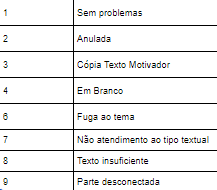

##**Valores Ausentes**

In [129]:
vestibulandos['IDADE'].isnull().sum() # verifica valores ausentes e soma

0

In [146]:
provas1 = ['NOTA_REDACAO','NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH']

In [ ]:
# Registros NAN nas notas
vestibulandos[provas1].isnull().sum()

In [132]:
vestibulandos_classificados = vestibulandos.loc[vestibulandos.TP_PRESENCA_CH == 1]
vestibulandos_classificados = vestibulandos_classificados.loc[vestibulandos_classificados.TP_PRESENCA_MT == 1]

In [136]:
vestibulandos_classificados['TP_PRESENCA_MT'].value_counts()

1    499940
Name: TP_PRESENCA_MT, dtype: int64

In [137]:
vestibulandos_classificados['TP_PRESENCA_CH'].value_counts()

1    499940
Name: TP_PRESENCA_CH, dtype: int64

In [138]:
vestibulandos_classificados['TP_PRESENCA_CN'].value_counts()

1    499940
Name: TP_PRESENCA_CN, dtype: int64

In [139]:
vestibulandos_classificados['TP_PRESENCA_LC'].value_counts()

1    499940
Name: TP_PRESENCA_LC, dtype: int64

In [ ]:
vestibulandos_classificados[provas1].isnull().sum()

##** Notas zeros na Redação**

In [ ]:
from collections import Counter
dict(Counter(vestibulandos_classificados['NOTA_REDACAO']))

In [148]:
vestibulandos_classificados.query('NOTA_REDACAO == 0')['NOTA_REDACAO'].value_counts()

0.0    9181
Name: NOTA_REDACAO, dtype: int64

In [ ]:
vestibulandos_classificados.query('COMP1 == 0')['COMP1'].value_counts()

In [ ]:
vestibulandos_classificados.query('COMP2 == 0')['COMP2'].value_counts()

In [ ]:
vestibulandos_classificados.query('COMP3 == 0')['COMP3'].value_counts()

In [ ]:
vestibulandos_classificados.query('COMP4 == 0')['COMP4'].value_counts()

In [ ]:
vestibulandos_classificados.query('COMP5 == 0')['COMP5'].value_counts()

NOTAS ZEROS EM REDAÇÃO:

REDAÇÃO (final): 9181 notas zeros devido a não cumprimento das regras ou tirou zero em todos os cinco componentes.

COMPONENTE 1(Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.): 9188 notas zeros somente neste item.

COMPONENTE 2 (Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa): 9181.

COMPONENTE 3 (Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista): 9197 notas zeros somente neste item.

COMPONENTE 4 (Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.): 9194 notas zeros somente neste item.

COMPONENTE 5 (Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos): 73330 notas zeros somente neste item.


In [ ]:
vestibulandos_classificados.query('NOTA_CH == 0')['NOTA_CH'].value_counts()

In [ ]:
vestibulandos_classificados.query('NOTA_CN == 0')['NOTA_CN'].value_counts()

In [ ]:
vestibulandos_classificados.query('NOTA_LC == 0')['NOTA_LC'].value_counts()

In [ ]:
vestibulandos_classificados.query('NOTA_MT == 0')['NOTA_MT'].value_counts()

In [158]:
vestibulandos_classificados.query('NOTA_REDACAO == 0')['NOTA_REDACAO'].value_counts()

0.0    9181
Name: NOTA_REDACAO, dtype: int64

NOTAS ZEROS DOS INSCRITOS CONCORRENTES AO VESTIBULAR:

Matemática = 56

Ciências da Natureza = 36

Linguagens e Códigos = 135

Ciências Humanas = 343

Redação = 9181


In [159]:
vestibulandos_classificados.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,35,SP,22,M,1,parda,1,1506500.0,1,não_respondeu,0,NaN,NaN,1,1,1,1,564.6,5.858,5.929,6.002,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
2,"1,90E+11",São Paulo,35,SP,17,F,1,parda,1,1501402.0,2,privada,0,15567761.0,Belém,1,1,1,1,576.2,6.411,6.343,7.318,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
3,"1,90E+11",São Bernardo do Campo,35,SP,19,M,1,parda,1,3548708.0,2,pública,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,4.248,5.096,3.932,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
5,"1,90E+11",Embu-Guaçu,35,SP,17,F,1,parda,1,1301902.0,2,pública,0,NaN,NaN,1,1,1,1,399.6,4.268,4.872,4.192,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
8,"1,90E+11",Guarulhos,35,SP,23,F,1,branca,1,3550308.0,1,não_respondeu,0,NaN,NaN,1,1,1,1,625.7,6.465,6.293,7.961,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [ ]:
vestibulandos_classificados = vestibulandos_classificados.drop(columns=['IN_TREINEIRO', 'presenca_total'],)

In [161]:
vestibulandos_classificados.shape

(499940, 31)

## **Salvando (Exportando) o Dataframe Tratado**

In [166]:
vestibulandos_classificados.to_csv('enem_2019_tratado.csv', encoding = 'iso-8859-1', index = False)